In [45]:
!pip install opendatasets
!pip install emoji==1.7.0
!pip install langdetect
!pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Import Library yg dibutuhkan

from textwrap import wrap
import opendatasets as od
# import emoji
import joblib
import langdetect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

od.download("https://www.kaggle.com/datasets/syahrulhamdani/indonesias-trending-youtube-video-statistics")

plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: daudridho
Your Kaggle Key: ··········


100%|██████████| 72.6M/72.6M [00:00<00:00, 144MB/s]


In [6]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           2669         79  1.0              
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25          19033        533  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           1903         53  1.0              
fuarresvij/gdp-growth-around-the-globe                      

In [7]:
def get_category_dict(category_file):
  category = pd.read_json(category_file, orient="records")
  category = pd.DataFrame(category["items"].values.tolist())
  return {
    cat.id: cat.snippet.get("title")
    for cat in category.itertuples(index=False)
  }

In [8]:
category_dict = get_category_dict("/content/drive/MyDrive/Data_expert/category.json")
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [9]:
# trending = pd.read_csv("/content/indonesias-trending-youtube-video-statistics/trending.csv", parse_dates=["publish_time", "trending_time"])
trending = pd.read_csv("/content/drive/MyDrive/Data_expert/indonesias-trending-youtube-video-statistics/trending.csv", parse_dates=["publish_time", "trending_time"])

with pd.option_context("display.max_columns", None):
  display(trending.head())

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05 09:00:34+00:00,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,none,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,2d,hd,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04 15:54:08+00:00,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,none,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,2d,hd,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06 03:00:22+00:00,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,none,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,2d,hd,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05 20:26:08+00:00,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,none,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,2d,hd,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03 23:14:54+00:00,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,none,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,2d,hd,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In [10]:
start_date = trending.trending_time.min()
end_date = trending.trending_time.max()

print(f"start_date = {start_date}")
print(f"end_date = {end_date}")

start_date = 2021-02-07 05:46:51.832614+00:00
end_date = 2022-11-25 06:01:21.336001+00:00


In [11]:
#delete data dari bulan Februari - Juni

filtered_trending = trending[trending.trending_time.dt.month >= 7]
start_date = filtered_trending.trending_time.min()
end_date = filtered_trending.trending_time.max()

print(f"start_date = {start_date}")
print(f"end_date = {end_date}")

start_date = 2021-07-01 06:01:25.524449+00:00
end_date = 2022-11-25 06:01:21.336001+00:00


In [12]:
num_videos = filtered_trending.shape[0]
print(f"num_videos ={num_videos}")

num_videos =64918


In [13]:
#Distribusi Missing value
filtered_trending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64918 entries, 21322 to 119950
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           33118 non-null  object             
 1   publish_time       64918 non-null  datetime64[ns, UTC]
 2   channel_id         64918 non-null  object             
 3   title              64918 non-null  object             
 4   description        62640 non-null  object             
 5   thumbnail_url      33118 non-null  object             
 6   thumbnail_width    33118 non-null  float64            
 7   thumbnail_height   33118 non-null  float64            
 8   channel_name       64918 non-null  object             
 9   tags               56521 non-null  object             
 10  category_id        64918 non-null  int64              
 11  live_status        64918 non-null  object             
 12  local_title        64918 non-null  object

In [14]:
#Deletee Video dengan description kosong

filtered_trending.dropna(subset=["description"], inplace=True)

In [15]:
trending_by_date = filtered_trending.groupby(
    filtered_trending.trending_time.dt.date
)
num_trending_per_day = trending_by_date.trending_time.count()
print("number of videos in trending per day:", num_trending_per_day.unique())

number of videos in trending per day: [195 196 197 198 194 193 192 191 190 188 187 185 189 186 184 183 132 182
 181 179 176 172 155 144 149 148 141 140 131 129 145 167 163 157 156 175
 169 199 200]


In [16]:
trending_duration = filtered_trending.groupby("title").agg(
  trending_duration=pd.NamedAgg(column="trending_time", aggfunc="count"),
  trending_start_date=pd.NamedAgg(column="trending_time", aggfunc="min"),
  trending_last_date=pd.NamedAgg(column="trending_time", aggfunc="max")
).sort_values("trending_duration", ascending=False).reset_index()

trending_duration.head(10)

,title,trending_duration,trending_start_date,trending_last_date
0,"JEJE PENGHUNI STASIUN DUKUH ATAS, PERNAH CABUT...",37,2022-07-02 06:01:31.621150+00:00,2022-08-07 06:01:00.607537+00:00
1,Toleransi antar tetangga di Korea🇰🇷.. 🤦🏻‍♂️,37,2022-07-02 06:01:31.621606+00:00,2022-08-07 06:01:00.607651+00:00
2,"NEGO 1 GEROBAK SHAWARMA VIRAL DI TIKTOK, SAMPE...",36,2022-07-08 06:01:39.900318+00:00,2022-08-12 06:01:33.892049+00:00
3,OPW ARES Sudah Tamat,35,2022-07-02 06:01:31.621296+00:00,2022-08-05 06:02:43.644196+00:00
4,SINGAPORE STREET FOOD #08,35,2022-07-02 06:01:31.621620+00:00,2022-08-06 06:02:02.694750+00:00
5,"Tantangin VYN Pake Franco, 1 Kali Kena Hook Da...",35,2022-07-01 06:01:38.284040+00:00,2022-08-04 06:02:04.519603+00:00
6,Kok di Indonesia ada penjual Rawon yg lebih pi...,34,2022-07-02 06:01:31.621592+00:00,2022-08-04 06:02:04.519738+00:00
7,SELAMAT LEBARAN GUYS!!!,33,2022-07-11 06:00:59.413948+00:00,2022-08-12 06:01:33.891919+00:00
8,BORONG ISI KULKAS SAMA BABY SHARK!!!,32,2022-07-02 06:01:31.621266+00:00,2022-08-02 06:14:40.735514+00:00
9,gak bisa bahasa enggres,32,2022-07-01 06:01:38.284013+00:00,2022-08-01 06:01:08.899895+00:00


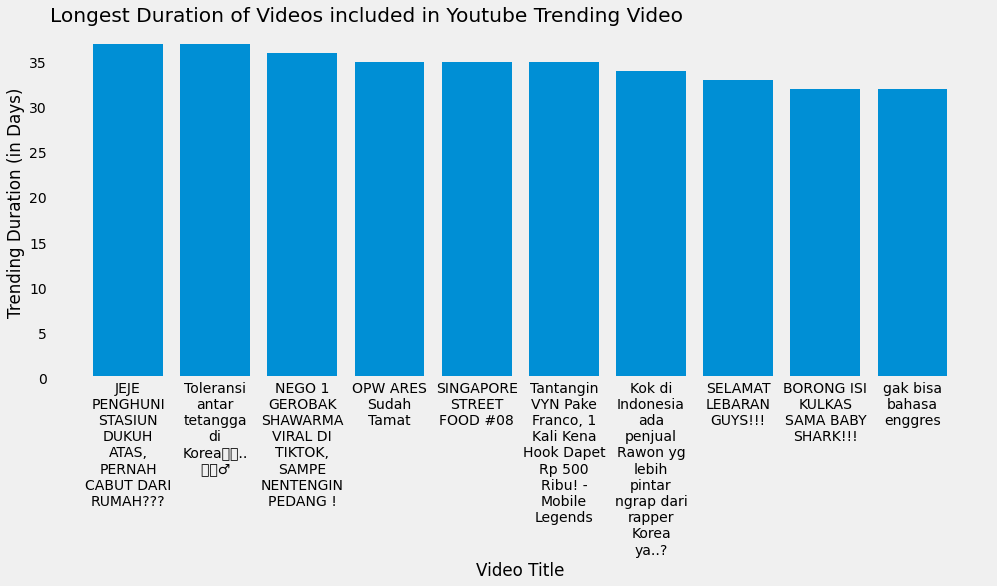

In [17]:
#Visualisasi data trending dengan chart bar

plt.figure(figsize= (15, 6))
plt.bar(
    trending_duration.title[:10].apply(lambda title: "\n".join(wrap(title, width=10))),
    trending_duration.trending_duration[:10]
)
plt.title("Longest Duration of Videos included in Youtube Trending Video", loc="left")
plt.xlabel("Video Title")
plt.ylabel("Trending Duration (in Days)")
plt.grid(False)
plt.show()

In [18]:
# Sebagai contoh, perhatikan sampei juduL dan deskripsi video berikut.
sample = filtered_trending.sample(10, random_state=11)
sample[["title", "description"]]

,title,description
118554,IBT E80: PERSAINGAN NJAN & SONU PAII DAPETIN P...,#sule #njan #ratu #inibukantalkshow \nJangan l...
51038,HAPPY ASMARA - IKHLAS ( Official Music Video )...,HAPPY ASMARA - IKHLAS ( Official Music Video )...
55100,YANG SEBENARNYA TERJADI..,Klik SUBSCRIBE (100% Gratis) : \nhttps://www.y...
47187,Kapolres Tebing Tinggi Dicopot dari Jabatan Us...,Hukuman pencopotan jabatan dijatuhkan pada Kap...
119620,Dasar orang Korea...Makan nasi goreng aja baha...,#인도네시아음식#나시고랭#미고랭\nMukbang nasi goreng mie gor...
54047,West Ham 3-2 Chelsea | Premier League Highlights,Watch the highlights from Chelsea's Premier Le...
24107,Madison Beer - Reckless (Official Alternate En...,Madison Beer - Reckless (Official Alternate En...
101898,JOKO TINGKIR - Arlida Putri & Lala Widy ft Age...,Official Live Music from Arlida Putri & Lala W...
38673,FULL ALBUM KOPLO JAWA TERBARU 2021 NONSTOP FUL...,PLAYLIST :\n\n1. Lemah Teles\n3. Aku Bukan Jod...
113230,IBT E70: PARAH!!! NJAN BERANI BANGET NEMBAK ZA...,#sule #inibukantalkshow #njan\nJangan lupa sub...


In [19]:
# Merubah title dan descripsi video menjadi Lowercase
sample["title_lang"] = sample.title.apply(lambda title: langdetect.detect(title.lower()))
sample["desc_lang"] = sample.description.apply(lambda desc: langdetect.detect(desc.lower()))

In [20]:
with pd.option_context("display.max_colwidth", 100):
  display(sample[["title", "title_lang", "description", "desc_lang"]])

,title,title_lang,description,desc_lang
118554,"IBT E80: PERSAINGAN NJAN & SONU PAII DAPETIN PERHATIAN RATU AULIA,TIKTOKERS FOLLOWERS 13 JUTA!",id,"#sule #njan #ratu #inibukantalkshow \nJangan lupa subscribe, like, share & comment S-PRO!\n\nLan...",id
51038,HAPPY ASMARA - IKHLAS ( Official Music Video ) tak jogo tresnamu di nggo atiku,en,HAPPY ASMARA - IKHLAS ( Official Music Video )\n\nExecutive Producer : Fortuna Enterprise\n\nMUS...,id
55100,YANG SEBENARNYA TERJADI..,id,Klik SUBSCRIBE (100% Gratis) : \nhttps://www.youtube.com/channel/UCvc00uetYIML9D-7BBrEXLA\n\nFOL...,en
47187,Kapolres Tebing Tinggi Dicopot dari Jabatan Usai Istri Pamer Uang di TikTok,id,Hukuman pencopotan jabatan dijatuhkan pada Kapolres Tebingtinggi AKBP Agus Sugiyarso. Sang Kapol...,id
119620,Dasar orang Korea...Makan nasi goreng aja bahagia bingit bingit!!🥰🥰,id,#인도네시아음식#나시고랭#미고랭\nMukbang nasi goreng mie goreng makanan paling dasar Indonesia!!\n\nNasi Goren...,id
54047,West Ham 3-2 Chelsea | Premier League Highlights,en,Watch the highlights from Chelsea's Premier League trip to West Ham.\n\nDownload Chelsea FC's of...,en
24107,Madison Beer - Reckless (Official Alternate Ending Video),en,"Madison Beer - Reckless (Official Alternate Ending Video)\n\n""Reckless"" available at: https://ma...",en
101898,JOKO TINGKIR - Arlida Putri & Lala Widy ft Ageng Music (Official Live Music),en,Official Live Music from Arlida Putri & Lala Widy ft Ageng Music - Joko Tingkir\nSubscribe Ageng...,id
38673,FULL ALBUM KOPLO JAWA TERBARU 2021 NONSTOP FULLBASS PALING ENAK!!!,id,PLAYLIST :\n\n1. Lemah Teles\n3. Aku Bukan Jodohnya\n4. Mandek Nangis\n5. Cidro 2\n6. Cerito Lor...,id
113230,IBT E70: PARAH!!! NJAN BERANI BANGET NEMBAK ZARA LEORA DI DEPAN AYAH ENDA!!,id,"#sule #inibukantalkshow #njan\nJangan lupa subscribe, like, share & comment S-PRO!\n\nLangganan ...",id


In [21]:
# Pertama, kita akan buat fungsi yang ahan mendeteksi bahasa dari sebuah teks sebagai berihut.
def detect_language(text):
  try:
    lang = langdetect.detect(text)
    return lang
  except:
    return

filtered_trending["title_lang"] = filtered_trending["title"].apply(detect_language)
filtered_trending["desc_lang"] = filtered_trending["description"].apply(detect_language)
filtered_trending[["title", "title_lang", "description", "desc_lang"]]

,title,title_lang,description,desc_lang
21322,NCT DREAM 엔시티 드림 'Hello Future' MV,it,"NCT DREAM's 1st Album Repackage ""Hello Future""...",en
21323,PART 3 // SUTRISNO DAN ENDANG BAHAGIA,de,Find me on sosial media :\n\nInstagram : https...,en
21324,This isn't David Copperfield Magic trick😂 #sho...,en,Thank you for watching.\nSubscribe to Tsuriki ...,en
21325,Rizky Billar - Pemimpinmu | Official Music Video,en,Rizky Billar - Pemimpinmu | Official Music Vid...,id
21326,Ini Pengakuan Pengemudi Pajero usai Rusak dan ...,id,Polisi menangkap pengemudi SUV yang merusak da...,id
...,...,...,...,...
119946,SATU RASA CINTA - ICHA KISWARA Feat SAVANA SAK...,en,SATU RASA CINTA\nCipt : Ajhay Pasma...,en
119947,NCT 127 '윤슬 (Gold Dust)' @NCT 127 2ND TOUR 'NE...,en,Listen and download on your favorite platform:...,en
119948,DIKE SABRINA - LUNGAMU NINGGAL KENANGAN 2 Ft.B...,en,DIKE SABRINA - LUNGAMU NINGGAL KENANGAN 2 Ft.B...,id
119949,NCT DREAM 엔시티 드림 'Dream-lapse' Performance Vid...,en,NCT DREAM Official\nhttps://www.youtube.com/nc...,en


In [22]:
indo_trending = filtered_trending.loc[(filtered_trending.title_lang == "id") | (filtered_trending.desc_lang == "id")
]

with pd.option_context("display.max_columns", None):
  display(indo_trending.sample(10))

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time,title_lang,desc_lang
24993,NaN,2021-07-13 06:00:10+00:00,UCSEC_Noejl2nBayTD-F6tpw,"NETIZEN NGGAK TAU, KALAU.... #OSHICIS",#OSHICIS\n\nSahabat yang mau melihat ceramah U...,NaN,NaN,NaN,Oki Setiana Dewi,"['oki setiana dewi', 'osd', 'ria ricis', 'doa ...",24,none,"NETIZEN NGGAK TAU, KALAU.... #OSHICIS",#OSHICIS\n\nSahabat yang mau melihat ceramah U...,PT14M5S,2d,hd,False,True,NaN,NaN,343375.0,23364.0,78.0,0,399.0,2021-07-19 06:02:49.429297+00:00,vi,id
92948,ErkINEVi5hk,2022-06-05 11:00:07+00:00,UCTJDdO9klWGpTekswnXreGQ,SpongeBob | 25 MENIT Momen Meme SpongeBob Terl...,"""Momen Meme SpongeBob Terlucu selama 25 menit!...",https://i.ytimg.com/vi/ErkINEVi5hk/hqdefault.jpg,480.0,360.0,Nickelodeon Bahasa,"['nickelodeon', 'Indonesia', 'bahasa', 'nick',...",1,none,SpongeBob | 25 MENIT Momen Meme SpongeBob Terl...,"""Momen Meme SpongeBob Terlucu selama 25 menit!...",PT26M4S,2d,hd,False,True,NaN,NaN,1067665.0,9138.0,NaN,0,0.0,2022-07-08 06:01:39.907145+00:00,id,id
97479,7ztHiG1BExE,2022-07-20 12:10:42+00:00,UCDCBzQLR7UrHxDUU1pHHorw,Ketemu Teman Cewek Love In Russia di Bali! Pol...,Polina Berestova :\nhttps://www.instagram.com/...,https://i.ytimg.com/vi/7ztHiG1BExE/hqdefault.jpg,480.0,360.0,Turah Parthayana,"['turah parthayana', 'turah pacar', 'polina be...",22,none,Ketemu Teman Cewek Love In Russia di Bali! Pol...,Polina Berestova :\nhttps://www.instagram.com/...,PT12M37S,2d,hd,False,True,NaN,NaN,560265.0,17830.0,NaN,0,976.0,2022-08-05 06:02:43.641793+00:00,id,id
29958,NaN,2021-08-09 08:39:37+00:00,UCK80fj7o9HUEWvobSVp2J-Q,PANJI MURKA DAN SITA NENENG SI MONYET MALANG D...,Gw gak pernah usil sama orang yang nyari duit ...,NaN,NaN,NaN,PANJI PETUALANG,NaN,15,none,PANJI MURKA DAN SITA NENENG SI MONYET MALANG D...,Gw gak pernah usil sama orang yang nyari duit ...,PT11M39S,2d,hd,False,True,NaN,NaN,855588.0,17013.0,292.0,0,2096.0,2021-08-13 06:01:03.725369+00:00,de,id
114974,YC_4_7lXp_4,2022-10-30 05:15:01+00:00,UCFQoE23adk7NSPNhBlanu4w,MALAM KEAKRABAN YANG MEMBAWA PETAKA,Support terus ya kita berteman dengan klik tom...,https://i.ytimg.com/vi/YC_4_7lXp_4/hqdefault.jpg,480.0,360.0,Hirotada Radifan,NaN,24,none,MALAM KEAKRABAN YANG MEMBAWA PETAKA,Support terus ya kita berteman dengan klik tom...,PT26M5S,2d,hd,False,True,NaN,NaN,601957.0,36302.0,NaN,0,2665.0,2022-11-01 06:01:28.735379+00:00,id,id
109978,jyQxugiVvbI,2022-10-06 07:28:39+00:00,UCKII0Ml9S5wneKbHswmUrIQ,Saat Jurnalis Tak Bisa Menahan Tangis di Pintu 13,Tragedi yang menewaskan 131 orang di Stadion K...,https://i.ytimg.com/vi/jyQxugiVvbI/hqdefault.jpg,480.0,360.0,CNN Indonesia,"['tragedi kanjuruhan', 'pintu 13', 'stadion ka...",25,none,Saat Jurnalis Tak Bisa Menahan Tangis di Pintu 13,Tragedi yang menewaskan 131 orang di Stadion K...,PT2M41S,2d,hd,False,True,NaN,NaN,843939.0,10654.0,NaN,0,2297.0,2022-10-07 06:01:44.861603+00:00,id,id
112988,XBsuQ2OT2OU,2022-10-19 08:41:28+00:00,UC1dI4tO13ApuSX0QeX8pHng,"Speknya terlalu bagus buat 2,5 JUTA! Unboxing ...",Pawang MediaTek is bek.\n\nKalau minat sama HP...,https://i.ytimg.com/vi/XBsuQ2OT2OU/hqdefault.jpg,480.0,360.0,GadgetIn,NaN,28,none,"Speknya terlalu bagus buat 2,5 JUTA! Unboxing ...",Pawang MediaTek is bek.\n\nKalau minat sama HP...,PT12M20S,2d,hd,False,True,NaN,NaN,874967.0,26088.0,NaN,0,3887.0,2022-10-22 06:01:51.677681+00:00,id,id
26279,NaN,2021-07-19 14:52:47+00:00,UCVen6wAtr65yRkZjtPeuKYA,Live Streaming - Gema Takbir Idul Adha 1442 H ...,"Assalamualaikum teman teman, \nHari ini Gema T...",NaN,NaN,NaN,Muhammad Hadi Assegaf,"['muhammad hadi assegaf', 'shalawat hadi asseg...",24,none,Live Streaming - Gema Takbir Idul Adha 1442 H ...,"Assalamualaikum teman teman, \nHari ini Gema T...",PT3H3M55S,2d,hd,False,True,NaN,NaN,202621.0,7454.0,213.0,

In [23]:
data = indo_trending[["title", "description", "category_id"]].reset_index(drop=True)
data

,title,description,category_id
0,Rizky Billar - Pemimpinmu | Official Music Video,Rizky Billar - Pemimpinmu | Official Music Vid...,10
1,Ini Pengakuan Pengemudi Pajero usai Rusak dan ...,Polisi menangkap pengemudi SUV yang merusak da...,25
2,Aksi Demo Tolak Kedatangan Jokowi di Kendari B...,Tanggal Tayang: 30/06/2021\n\nProgram berita h...,25
3,"PERTAMA KALI LIAT SAPI SEGEDE GINI, DINAIKIN D...",Assalamualaikum gaeess..! sudah nonton video s...,15
4,PODKESMAS SAMPAI GA NYAMAN DIBAHAS DISINI - To...,Talk show malam yang akan memberikan informasi...,24
...,...,...,...
38744,"FAREL, NAGITA, SARWENDAH, & AUREL - NYANYIAN A...",Siapa yang langsung inget masa kecil setelah n...,24
38745,UCOK BABA INSPIRASI BESAR BUAT VINCENT DESTA -...,Talk show malam yang akan memberikan informasi...,24
38746,Jurnalrisa #218 - GANGGUAN DI BANGUNAN RUMAH B...,Dengerin Podcasttery Jurnalrisa di Spotify \nh...,22
38747,DIKE SABRINA - LUNGAMU NINGGAL KENANGAN 2 Ft.B...,DIKE SABRINA - LUNGAMU NINGGAL KENANGAN 2 Ft.B...,22


In [24]:
data.drop_duplicates(subset="title", inplace=True)

In [25]:
data.reset_index(drop=True, inplace=True)
data.shape

(6273, 3)

In [26]:
list_emoji = [e for e in emoji.UNICODE_EMOJI.get("en")]

count = 0
for em in list_emoji:
  for title in data.title:
    if em in title:
      count += 1

print("How many titles use emoji?", count)

How many titles use emoji? 806


In [27]:
def demojize(text):
  for em in list_emoji:
    if em in text:
      em_text = emoji.demojize(em)
      text = text.replace(em, " " + em_text + " ")
  return text

In [28]:
data["title_emoji"] = data.title.apply(demojize)

In [29]:
title_with_emoji_idx = [
  idx for idx in range(len(data.title))
  for em in list_emoji
  if em in data.loc[idx, "title"]
]

In [30]:
with pd.option_context("display.max_colwidth", 100):
  display(data.loc[title_with_emoji_idx])

,title,description,category_id,title_emoji
34,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih...❤,Saksikan #DariJendelaSMP Setiap Hari Pkl. 16.40 WIB hanya di @Surya Citra Televisi (SCTV) \n@sin...,24,Dari Jendela Smp : GREGETTT...Wih kelihatannya Wulan jadi primadona di SMA Merdeka Mandiri nih.....
78,BIKIN CEWEK TERPESONA 😍 Aksi Heroik Driver Muda Menolong Sopir Yang Kesulitan di Sitinjau Lauik,Aksi heroik driver muda membantu sopir minibus yang kesulitan di Sitinjau Lauik\n\ninstagram : h...,2,BIKIN CEWEK TERPESONA :smiling_face_with_heart-eyes: Aksi Heroik Driver Muda Menolong Sopir Ya...
79,15 MENIT MEMBAKAR LEMAK 1 Kg !!! 24 Jam TIMBANGAN TURUN ✅ ✅ ✅,"15 menit membakar lemak, ok ! siapa yg workout mengharapkan bisa membakar 1 kg lemak dalam 15 me...",26,15 MENIT MEMBAKAR LEMAK 1 Kg !!! 24 Jam TIMBANGAN TURUN :check_mark_button: :check_mark_butto...
147,"WHY‼️ SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast","#somasi #odgj #podcast\nTEMAN TEMAN KONTEN CREATOR, JANGAN TAKUT BERKARYA SELAMA TUJUAN KALIAN B...",24,"WHY :double_exclamation_mark: SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast"
147,"WHY‼️ SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast","#somasi #odgj #podcast\nTEMAN TEMAN KONTEN CREATOR, JANGAN TAKUT BERKARYA SELAMA TUJUAN KALIAN B...",24,"WHY :double_exclamation_mark: SAYA DISOMASI, TOLOOONG...- Deddy Corbuzier Podcast"
...,...,...,...,...
6219,AKU BIKIN SUPER MEGA TANK AQUARIUM UNTUK ISTRI KU ‼️ Survival Bucin [#3],- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...,20,AKU BIKIN SUPER MEGA TANK AQUARIUM UNTUK ISTRI KU :double_exclamation_mark: Survival Bucin [#3]
6223,TUTORIAL JOY HERO BARU | PENJELASAN COMBO SKILL JOY ❗ BUILD JOY TERSAKIT + CARA MAIN JOY GAMEPLAY,Halo semuanya. Di video kali ini kita bakal bahas Tutorial Joy Hero Baru. Penjelasan Combo Skill...,20,TUTORIAL JOY HERO BARU | PENJELASAN COMBO SKILL JOY :red_exclamation_mark: BUILD JOY TERSAKIT ...
6260,KITA MENCARI CARA UNTUK KEMBALI PULANG ‼️ Romantic Raft [#2],- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...,20,KITA MENCARI CARA UNTUK KEMBALI PULANG :double_exclamation_mark: Romantic Raft [#2]
6260,KITA MENCARI CARA UNTUK KEMBALI PULANG ‼️ Romantic Raft [#2],- Subcribe Gratis : https://goo.gl/9DnNkc\n- Join TeguhTeam : https://www.youtube.com/channel/U...,20,KITA MENCARI CARA UNTUK KEMBALI PULANG :double_exclamation_mark: Romantic Raft [#2]


In [31]:
# Delete kolom title
data.drop(columns="title", inplace=True)

In [32]:
desc_with_emoji_idx = [
  idx for idx in range(len(data.description))
  for em in list_emoji
  if em in data.loc[idx, "description"]
]

data["desc_emoji"] = data.description.apply(demojize)
with pd.option_context("display.max_colwidth", 199):
  display(data.loc[desc_with_emoji_idx])

,description,category_id,title_emoji,desc_emoji
0,"Rizky Billar - Pemimpinmu | Official Music Video\n\nSurprise Untuk Dede Lesti :\nhttps://youtu.be/MraBsMJjArU\n\nBeberapa waktu lalu, Rizky Billar dan Lesti Kejora resmi bertunangan. Pasangan ini...",10,Rizky Billar - Pemimpinmu | Official Music Video,"Rizky Billar - Pemimpinmu | Official Music Video\n\nSurprise Untuk Dede Lesti :\nhttps://youtu.be/MraBsMJjArU\n\nBeberapa waktu lalu, Rizky Billar dan Lesti Kejora resmi bertunangan. Pasangan ini..."
8,#LestiBawaAkuKePenghulu #Lesti #MusicVideo #LiveAcoustic\n\nAura bahagia semakin terpancar dengan Lesti menyanyikan lagu 'Bawa Aku Ke Penghulu' versi akustik. Kamu pasti bakalan senyum-senyum se...,10,Lesti - Bawa Aku Ke Penghulu | Live Acoustic Version,#LestiBawaAkuKePenghulu #Lesti #MusicVideo #LiveAcoustic\n\nAura bahagia semakin terpancar dengan Lesti menyanyikan lagu 'Bawa Aku Ke Penghulu' versi akustik. Kamu pasti bakalan senyum-senyum se...
11,"Title: Sempurnakan Hariku \nArtist: Rey Mbayang\nComposser: Rey Mbayang, Trakast\nMusic Arranger: Yafi Aria\nMixing & Mastering: Arya Yudistira\nDOP, editor, colorist: Cindy Deka Pratiwi\nLabel: ...",10,Rey Mbayang - Sempurnakan Hariku (Official Music Video),"Title: Sempurnakan Hariku \nArtist: Rey Mbayang\nComposser: Rey Mbayang, Trakast\nMusic Arranger: Yafi Aria\nMixing & Mastering: Arya Yudistira\nDOP, editor, colorist: Cindy Deka Pratiwi\nLabel: ..."
12,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini yuk :\nTiktok ♪ : https://vt.tiktok.com/ZSJPrxkaG\nSnack ♪ : http://sck.io/hvOG2cd0\nLikee ♪ : http...,10,Yeni Inka - Apa Kabar Mantan (Official Music Video ANEKA SAFARI) | JOOX ORIGINAL,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini yuk :\nTiktok ♪ : https://vt.tiktok.com/ZSJPrxkaG\nSnack ♪ : http://sck.io/hvOG2cd0\nLikee ♪ : http...
12,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini yuk :\nTiktok ♪ : https://vt.tiktok.com/ZSJPrxkaG\nSnack ♪ : http://sck.io/hvOG2cd0\nLikee ♪ : http...,10,Yeni Inka - Apa Kabar Mantan (Official Music Video ANEKA SAFARI) | JOOX ORIGINAL,Title: Apa Kabar Mantan\nArtist: Yeni Inka\nSongwriter: Yonanda NDX\n\nFollow juga kita disini yuk :\nTiktok ♪ : https://vt.tiktok.com/ZSJPrxkaG\nSnack ♪ : http://sck.io/hvOG2cd0\nLikee ♪ : http...
...,...,...,...,...
6270,"Nonton full episode The Indonesian Next Big Star di RCTI+ 👉 https://bit.ly/3gevu6r\n\nFANTASTIS!! sangat menarik dari penampilan dari JAY dan DK membawakan lagu ""Love Scenario + Killing Me"" yang ...",10,JAY iKON X DK iKON - Love Scenario + Killing Me | The Indonesian Big Star,"Nonton full episode The Indonesian Next Big Star di RCTI+ :backhand_index_pointing_right: https://bit.ly/3gevu6r\n\nFANTASTIS!! sangat menarik dari penampilan dari JAY dan DK membawakan lagu ""L..."
6270,"Nonton full episode The Indonesian Next Big Star di RCTI+ 👉 https://bit.ly/3gevu6r\n\nFANTASTIS!! sangat menarik dari penampilan dari JAY dan DK membawakan lagu ""Love Scenario + Killing Me"" yang ...",10,JAY iKON X DK iKON - Love Scenario + Killing Me | The Indonesian Big Star,"Nonton full episode The Indonesian Next Big Star di RCTI+ :backhand_index_pointing_right: https://bit.ly/3gevu6r\n\nFANTASTIS!! sangat menarik dari penampilan dari JAY dan DK membawakan lagu ""L..."
6270,"Nonton full episode The Indonesian Next Big Star di RCTI+ 👉 https://bit.ly/3gevu6r\n\nFANTASTIS!! sangat menarik dari penampilan dari JAY dan DK membawakan lagu ""Love Scenario + Killing Me"" yang ...",10,JAY iKON X DK iKON - Love Scenario + Killing Me | The Indonesian Big Star,"Nonton full episode The Indonesian Next Big Star di RCTI+ :backhand_index_pointing_right: https://bit.ly/3gevu6r\n\nFANTASTIS!! sangat menarik dari penampilan dari JAY dan DK membawakan lagu ""L..."
6271,.\nTitle: AYANG\nArtist: Farel Prayoga\nSongwriter: Nabila Maharani / Candra Adinugroho\nMusic Arrangement: ANEKA MUSIC\n\nMau Undan

In [33]:
data.drop(columns="description", inplace=True)

In [34]:
data["all_text"] = data["title_emoji"] + " " + data["desc_emoji"]

In [35]:
# data split
X_train, X_dev, y_train, y_dev = train_test_split(
  data["all_text"], data["category_id"],
  test_size=.2,
  stratify=data["category_id"],
  random_state=11
)

training_size = X_train.shape[0]
dev_size = X_dev.shape[0]
print(f"training_size = {training_size}. . dev_size = {dev_size}")

# define vectorizer
vectorizer = TfidfVectorizer(
  min_df=.015,
  max_df=.7,
  ngram_range=(1, 1),
)

# generate tf-idf matrix
train_tfidf = vectorizer.fit_transform(X_train)
dev_tfidf = vectorizer.transform(X_dev)
print("Got train tf—idf with shape: ", train_tfidf.shape) 
print("Got dev tf-idf with shape: ", dev_tfidf.shape)

# convert to dataframe 
train_tfidf = pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
dev_tfidf = pd.DataFrame(dev_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

training_size = 5018. . dev_size = 1255
Got train tf—idf with shape:  (5018, 911)
Got dev tf-idf with shape:  (1255, 911)


In [36]:
with pd.option_context("display.max_columns", 100):
  display(train_tfidf.sample(5))

,00,01,03,04,06,07,08,09,10,11,12,13,14,15,16,17,18,19,1dvz1au,1gxqz9s,1st,20,2020,2021,2022,21,22,23,24,28,2oukyag,2yfofxp,30,3ws0f48,45,62,academy,acara,ada,adalah,agar,agustus,ahmad,air,aja,ajak,akan,akhir,akhirnya,aksi,...,untukmu,up,update,updates,us,user,utama,utm_campaign,utm_medium,utm_source,v7,via,video,videonya,videos,vidio,viral,vlog,voc,vocal,vs,vt,wa,waktu,warga,watch,watching,web,website,wes,whatsapp,wib,with,withyoutube,wong,world,www,ya,yaa,yah,yaitu,yang,yen,yeni,yg,you,your,youtu,youtube,yuk
1713,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.138125,0.163796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410732,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.153549,0.000000,0.000000,0.0,0.0,0.077260,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2947,0.0,0.0,0.090733,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04651,0.0,0.0,0.0,0.0,0.079698,0.128511,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.047722,0.000000,0.0,0.0,0.105517,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
291,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.169236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.066841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.095254,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.062660,0.000000,0.000000,0.0,0.0,0.031528,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4604,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.247479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.169735,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.166811,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2267,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148457,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.111265,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.143674,0.0,0.0,0.091256,0.000000,0.129949,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.270299,0.098739


In [37]:
dict_models = {
  "logistic_regression": LogisticRegression(),
  "naive_bayes": MultinomialNB(),
  "svm": LinearSVC(random_state=11),
  "decision_tree" : DecisionTreeClassifier(random_state=11),
  "random_forest" : RandomForestClassifier(random_state=11)
}

In [38]:
for model in dict_models.values():
  print(f"-- {model.__class__.__name__} --")
  model.fit(train_tfidf, y_train)
  y_pred = model.predict(dev_tfidf)
  print("Reports on dev set:", classification_report(y_dev, y_pred), sep="\n")

-- LogisticRegression --
Reports on dev set:
              precision    recall  f1-score   support

           1       0.96      0.65      0.78        40
           2       0.96      0.75      0.84        36
          10       0.91      0.95      0.93       243
          15       1.00      0.27      0.43        11
          17       0.90      0.77      0.83        48
          19       1.00      0.29      0.44         7
          20       0.90      0.88      0.89       113
          22       0.78      0.64      0.70       119
          23       0.84      0.37      0.52        43
          24       0.75      0.92      0.83       416
          25       0.86      0.98      0.92       122
          26       0.62      0.26      0.37        19
          27       1.00      0.36      0.53        11
          28       1.00      0.60      0.75        15
          29       1.00      0.75      0.86        12

    accuracy                           0.83      1255
   macro avg       0.90      0.63  

In [39]:
svm_grid_search = GridSearchCV(
  dict_models["svm"],
  {"C": (19, 1, .1, .95, .91)},
)

svm_grid_search.fit(train_tfidf, y_train)
svm_pred_dev = svm_grid_search.predict(dev_tfidf)

print("Reports on train set:",
  classification_report(
  y_train,
  svm_grid_search.predict(train_tfidf)
  ), sep="\n")

print("Reports on dev set: ", classification_report(y_dev, svm_pred_dev), sep="\n")

Reports on train set:
              precision    recall  f1-score   support

           1       0.98      0.95      0.96       159
           2       0.98      1.00      0.99       144
          10       0.97      0.99      0.98       972
          15       0.98      1.00      0.99        44
          17       0.94      0.98      0.96       192
          19       1.00      0.89      0.94        27
          20       0.97      0.98      0.97       454
          22       0.97      0.89      0.93       477
          23       0.96      0.94      0.95       174
          24       0.95      0.95      0.95      1663
          25       0.94      0.98      0.96       489
          26       0.90      0.86      0.88        74
          27       0.97      0.86      0.91        43
          28       1.00      1.00      1.00        60
          29       1.00      0.98      0.99        46

    accuracy                           0.96      5018
   macro avg       0.97      0.95      0.96      5018
weig

In [40]:
svm_grid_search.best_params_

{'C': 0.95}

**Random Forest Classification**

In [41]:
random_forest_grid_search = GridSearchCV(
  dict_models["random_forest"],
  {
    "n_estimators": (10, 20, 25, 50, 75, 100, 125),
    "max_depth": (5, 10, 25, 50),
  }
)
random_forest_grid_search.fit(train_tfidf, y_train)
random_forest_pred = random_forest_grid_search.predict(dev_tfidf)
print("Reports on train set:",
  classification_report(
    y_train,
    random_forest_grid_search.predict(train_tfidf)
  ),
    sep="\n"
  )
print("Reports on dev set:", classification_report(y_dev, random_forest_pred), sep="\n")

Reports on train set:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       159
           2       1.00      0.98      0.99       144
          10       1.00      1.00      1.00       972
          15       1.00      0.95      0.98        44
          17       0.98      0.97      0.98       192
          19       1.00      0.85      0.92        27
          20       1.00      1.00      1.00       454
          22       1.00      0.99      0.99       477
          23       1.00      0.97      0.99       174
          24       0.97      1.00      0.99      1663
          25       1.00      1.00      1.00       489
          26       1.00      0.89      0.94        74
          27       1.00      0.95      0.98        43
          28       1.00      0.97      0.98        60
          29       1.00      1.00      1.00        46

    accuracy                           0.99      5018
   macro avg       1.00      0.97      0.98      5018
weig

In [42]:
random_forest_grid_search.best_params_

{'max_depth': 50, 'n_estimators': 125}

**Save Model**

In [43]:
model = Pipeline([
  ("vectorizer", TfidfVectorizer(
      min_df=.015,
      max_df=.7,
      ngram_range=(1, 1),
    )),
    ("model", RandomForestClassifier(
      max_depth=50,
      n_estimators=75,
      random_state=11
    ))
])

# training
model.fit(X_train, y_train)
pred = model.predict(X_dev)
print("Reports on train set:",
    classification_report(
    y_train,
    model.predict(X_train)
  ),
    sep="\n"
  )
print("Reports on dev set:", classification_report(y_dev, pred), sep="\n")

Reports on train set:
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       159
           2       1.00      0.97      0.98       144
          10       1.00      1.00      1.00       972
          15       1.00      0.93      0.96        44
          17       0.98      0.97      0.98       192
          19       1.00      0.85      0.92        27
          20       1.00      1.00      1.00       454
          22       1.00      0.99      0.99       477
          23       1.00      0.97      0.99       174
          24       0.97      1.00      0.98      1663
          25       1.00      1.00      1.00       489
          26       1.00      0.89      0.94        74
          27       1.00      0.95      0.98        43
          28       1.00      0.95      0.97        60
          29       1.00      1.00      1.00        46

    accuracy                           0.99      5018
   macro avg       1.00      0.96      0.98      5018
weig

In [47]:
joblib.dump(model, "/content/drive/MyDrive/Data_expert/modelyt.joblib")

['/content/drive/MyDrive/Data_expert/modelyt.joblib']

In [48]:
model = joblib.load("/content/drive/MyDrive/Data_expert/modelyt.joblib")
print(model.get_params())

{'memory': None, 'steps': [('vectorizer', TfidfVectorizer(max_df=0.7, min_df=0.015)), ('model', RandomForestClassifier(max_depth=50, n_estimators=75, random_state=11))], 'verbose': False, 'vectorizer': TfidfVectorizer(max_df=0.7, min_df=0.015), 'model': RandomForestClassifier(max_depth=50, n_estimators=75, random_state=11), 'vectorizer__analyzer': 'word', 'vectorizer__binary': False, 'vectorizer__decode_error': 'strict', 'vectorizer__dtype': <class 'numpy.float64'>, 'vectorizer__encoding': 'utf-8', 'vectorizer__input': 'content', 'vectorizer__lowercase': True, 'vectorizer__max_df': 0.7, 'vectorizer__max_features': None, 'vectorizer__min_df': 0.015, 'vectorizer__ngram_range': (1, 1), 'vectorizer__norm': 'l2', 'vectorizer__preprocessor': None, 'vectorizer__smooth_idf': True, 'vectorizer__stop_words': None, 'vectorizer__strip_accents': None, 'vectorizer__sublinear_tf': False, 'vectorizer__token_pattern': '(?u)\\b\\w\\w+\\b', 'vectorizer__tokenizer': None, 'vectorizer__use_idf': True, 'vec

In [49]:
preds = model.predict(X_dev)
print(classification_report(y_dev, preds))

              precision    recall  f1-score   support

           1       1.00      0.78      0.87        40
           2       1.00      0.81      0.89        36
          10       0.95      0.95      0.95       243
          15       1.00      0.64      0.78        11
          17       0.88      0.75      0.81        48
          19       1.00      0.43      0.60         7
          20       0.97      0.90      0.94       113
          22       1.00      0.74      0.85       119
          23       1.00      0.67      0.81        43
          24       0.79      0.95      0.87       416
          25       0.83      0.93      0.88       122
          26       0.93      0.68      0.79        19
          27       1.00      0.64      0.78        11
          28       1.00      0.67      0.80        15
          29       1.00      0.75      0.86        12

    accuracy                           0.88      1255
   macro avg       0.96      0.75      0.83      1255
weighted avg       0.90   